# Import libs

In [1]:
import numpy as np
from itertools import chain # list of list to one bit list

import matplotlib.pyplot as plt
%matplotlib inline

# Define model

In [2]:
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: '𝒩(μ={:.3f}, 𝜎²={:.3f})'.format(s[0], s[1])

# Define functions

In [3]:
def gaussian_multiply(g1, g2):
    mean = (g1.var * g2.mean + g2.var * g1.mean) / (g1.var + g2.var)
    variance = (g1.var * g2.var) / (g1.var + g2.var)
    return gaussian(mean, variance)

def update(prior, likelihood):
    posterior = gaussian_multiply(likelihood, prior)
    return posterior

def predict(pos, movement):
    return gaussian(pos.mean + movement.mean, pos.var + movement.var)

# Load syth data

In [4]:
import sys
sys.path.append("../..")

from data.SythData import LinearSteps, SinusoidWaves

In [5]:
data = SinusoidWaves(length_data=1000, cps_number=4, white_noise_level="min").get()

<Axes: xlabel='time'>

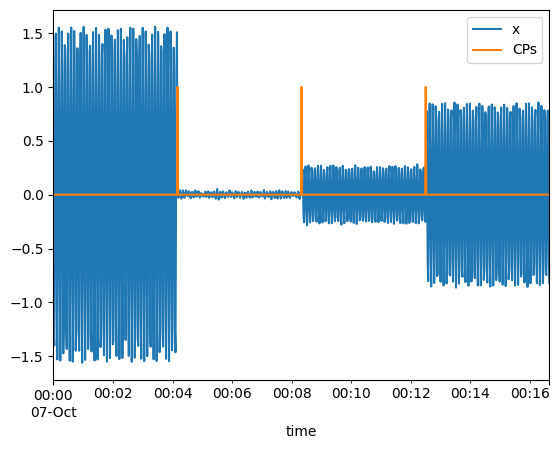

In [6]:
data.plot()

# Raw Pipe

In [7]:
array = data["x"].values

In [8]:
initial_gaussian = gaussian(array.mean(), array.var()*2)

In [9]:
window = 10

In [10]:
actual_gaussian = gaussian(array[:window].mean(), array[:window].var())

In [11]:
actual_gaussian

𝒩(μ=-0.297, 𝜎²=1.045)

In [12]:
preds_init_list = np.random.normal(loc=initial_gaussian.mean, scale=np.std(initial_gaussian.var), size=10)

In [13]:
new_initial_gaussian = update(initial_gaussian, actual_gaussian)

In [14]:
new_initial_gaussian

𝒩(μ=-0.129, 𝜎²=0.454)

In [15]:
new_initial_gaussian = predict(new_initial_gaussian, actual_gaussian)

In [16]:
new_initial_gaussian

𝒩(μ=-0.426, 𝜎²=1.499)

In [17]:
preds_next_list = np.random.normal(loc=new_initial_gaussian.mean, scale=np.std(new_initial_gaussian.var), size=10)

In [18]:
actual_gaussian = gaussian(array[window:window*2].mean(), array[window:window*2].var())

In [19]:
actual_gaussian

𝒩(μ=0.281, 𝜎²=1.065)

In [20]:
new_initial_gaussian = update(new_initial_gaussian, actual_gaussian)

In [21]:
new_initial_gaussian

𝒩(μ=-0.013, 𝜎²=0.623)

In [22]:
new_initial_gaussian = predict(new_initial_gaussian, actual_gaussian)

In [23]:
new_initial_gaussian

𝒩(μ=0.268, 𝜎²=1.688)

In [24]:
preds_next_list_2 = np.random.normal(loc=new_initial_gaussian.mean, scale=np.std(new_initial_gaussian.var), size=10)

In [25]:
actual_gaussian = gaussian(array[window*2:window*3].mean(), array[window*2:window*3].var())

In [26]:
actual_gaussian

𝒩(μ=-0.153, 𝜎²=1.223)

In [27]:
new_initial_gaussian = update(new_initial_gaussian, actual_gaussian)

In [28]:
new_initial_gaussian

𝒩(μ=0.024, 𝜎²=0.709)

In [29]:
new_initial_gaussian = predict(new_initial_gaussian, actual_gaussian)

In [30]:
new_initial_gaussian

𝒩(μ=-0.130, 𝜎²=1.932)

In [31]:
preds_next_list_3 = np.random.normal(loc=new_initial_gaussian.mean, scale=np.std(new_initial_gaussian.var), size=10)

In [32]:
actual_gaussian = gaussian(array[window*3:window*4].mean(), array[window*3:window*4].var())

In [33]:
actual_gaussian

𝒩(μ=-0.029, 𝜎²=1.291)

In [34]:
new_initial_gaussian = update(new_initial_gaussian, actual_gaussian)

In [35]:
new_initial_gaussian

𝒩(μ=-0.069, 𝜎²=0.774)

In [36]:
new_initial_gaussian = predict(new_initial_gaussian, actual_gaussian)

In [37]:
new_initial_gaussian

𝒩(μ=-0.098, 𝜎²=2.065)

# Check visual

In [36]:
import filterpy.stats as stats

In [37]:
def plot_products(g1, g2): 
    plt.figure()
    product = gaussian_multiply(g1, g2)

    xs = np.arange(5, 15, 0.1)
    ys = [stats.gaussian(x, g1.mean, g1.var) for x in xs]
    plt.plot(xs, ys, label='$\mathcal{N}$'+'$({},{})$'.format(g1.mean, g1.var))

    ys = [stats.gaussian(x, g2.mean, g2.var) for x in xs]
    plt.plot(xs, ys, label='$\mathcal{N}$'+'$({},{})$'.format(g2.mean, g2.var))

    ys = [stats.gaussian(x, product.mean, product.var) for x in xs]
    plt.plot(xs, ys, label='product', ls='--')
    plt.legend();

In [38]:
from ipywidgets import interact

def interactive_gaussian(m1, m2, v1, v2):
    g1 = gaussian(m1, v1)
    g2 = gaussian(m2, v2)
    plot_products(g1, g2)
    
interact(interactive_gaussian,
         m1=(5, 10., .5), m2=(10, 15, .5), 
         v1=(.1, 2, .1), v2=(.1, 2, .1));

interactive(children=(FloatSlider(value=7.5, description='m1', max=10.0, min=5.0, step=0.5), FloatSlider(value…